In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Random, Distributions

Attempting to Create a Time Crystal

In [2]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);


In [3]:
#The Random Field (Note the required Nesting):


RU=fill(fill(0.1+im, 2,2), 12); #Random Unitary

RH1=fill(fill(0.1+im, 2,2), 12); #NOTE: These two are Random Hermitian at this stage


RU1=fill(fill(0.1+im, 2,2), 12); #NOTE: These will be generated later from above



#Generating a GUE:
h=rand(12)*2;
#tht=rand(12)*pi;

for j in 1:length(RU)
    
#Symmetrisation and Exponentiation:
    
    RU[j]=exp(im*h[j]*Z);
  #  RU1[j]=RZ(0.01*tht[j]);
end


#Generating the set of controlabe Hermitian:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation:
    
    RH1[j]=(A+A')/2;
end






In [12]:
o=pi;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RU[1],RU[2],RU[3],RU[4],RU[5],RU[6],RU[7],RU[8],RU[9],RU[10],RU[11],RU[12]));


In [7]:
FU=fill(fill(0.1+im, 4,4), 6);
ordpar=fill(0.1,1);

#Looping:

#for al in 1:length(ordpar)
    
#    alpha=0.02*(al-1);
    alpha=0.11;

    for j in 1:length(RU)
        RU1[j]=exp(im*alpha*RH1[j]);
    end
       
    
    for j in 1:length(FU)
        FU[j]=CNOT*kronecker(RU1[j],RU1[j+6])*CNOT;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[2],FU[3],FU[4],FU[5],FU[6],I(2)));

   

In [13]:
 A=XRow*UEven*UOdd*ZRow

4096×4096 Matrix{ComplexF64}:
  -2.28144e-9+4.49764e-9im   …    -0.0998455-0.966097im
  2.50953e-10+1.24321e-8im        -0.0147505-0.0116293im
  -2.67371e-9-1.47991e-9im        -0.0165219-0.0128415im
  -5.55732e-8-1.47e-7im            -0.025904-0.0170412im
   2.68891e-9+9.29275e-9im            0.0406-0.00584364im
   -1.0235e-8-1.63457e-9im   …   -0.00046772-0.000536949im
  -5.86649e-9+5.47605e-10im       -0.0233861-0.0211431im
  -2.35403e-7-1.92199e-7im       0.000376614-0.00083429im
 -7.04902e-10+2.4103e-9im          0.0426022-0.00177487im
   6.10419e-8+3.19734e-8im       0.000482877-0.000608626im
  -2.92419e-9-2.93069e-9im   …   -0.00125937-0.00167881im
  -2.57038e-8-1.05035e-7im       0.000774329-0.00107676im
    6.5994e-8+2.14876e-8im         0.0650062-0.0143082im
             ⋮               ⋱              ⋮
    0.0014339+0.000120618im      -6.26837e-8-8.05743e-8im
  -8.80196e-7+0.00290378im   …  -2.82784e-10+1.22187e-9im
 -0.000202129+0.000775074im      2.07877e-10+7.48257e-8im
 

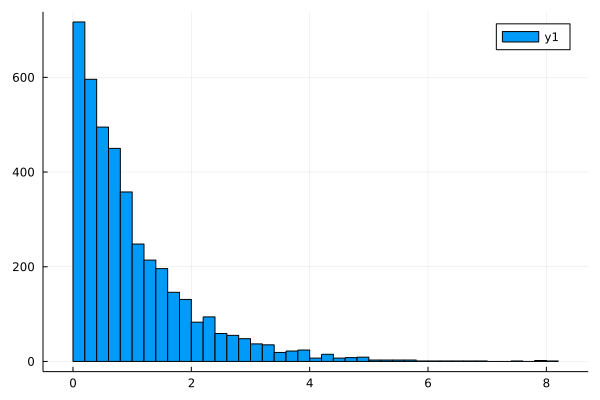

In [11]:

    
   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    
    n=fill(0.1,length(EigA)-2);

        for i in 1:length(n)
            #n[i]=m[i+1]/m[i];
            n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
        end

#    ordpar[al]=mean(n);
#end


 histogram(m)  


In [9]:
RU1[6]

2×2 Matrix{ComplexF64}:
 0.996964-0.0711726im  0.0220679-0.0225941im
 -0.02496-0.0193516im   0.997298-0.0663286im

# The Autocorrelator?

Position of Neel state:

In [77]:
Int(0b010101010101)

1365

constructing the Z insertion operators:

In [15]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

computing the autocorrelator:

In [16]:
Cii=fill(0.1, 12,25);

In [17]:
At=I(4096);
for t in 1:25
  #  for l in 1:12
        LM=copy(Zi[5]*Zi[5]*At);
        Cii[5,t]=abs(LM[1,1]);
  #  end
    At=A*At;
end

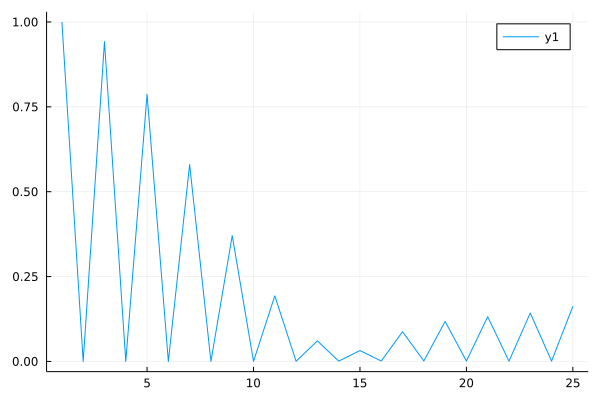

In [18]:
xax=1:25
plot(xax,Cii[5,:])

In [ ]:
xax=1:25
plot(xax,Cii[5,:])

In [26]:
C=fill(0.1, 25);

In [27]:
for i in 1:25
    Cimp=copy(Cii[:,i]);
    C[i]=mean(Cimp);
end

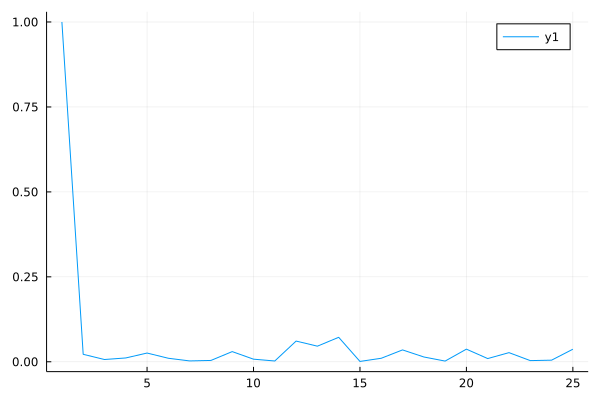

In [28]:
xax=1:25
plot(xax,C)

In [1]:
using CSV, Tables

In [3]:
CSV.write("FileName.csv",  Tables.table(x), writeheader=false)

"FileName.csv"

12-element Vector{Float64}:
 1.4625962680079378
 1.8259333153039174
 3.0367426059359577
 2.624347560968067
 1.6866111933413277
 0.35939467994129864
 0.5152537088325383
 2.6828970476305396
 0.7937795878862856
 0.5398873230477915
 0.1470309522186377
 0.4071150617751177